# PCNN Spatial Histogram

A spatial histogram, is a matrix of the same size as the given image, holding in each entry (i,j) the number of times a neuron has pulsed at this pixel position of a certain number of epochs

In [5]:
import sys, os
import time
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib
plt.ion()
from IPython import display
sys.path.insert(0, os.path.abspath('..'))
from pcnn import pcnn

In [11]:
# define the path to your image
img_name = os.path.join('/'.join(os.getcwd().split('/')[:-1]) ,'img','Lena.png')
# define the pcnn's parameters here
epochs = 100
# defines the linking strength
beta = 1.0
# defines the size of the receptive field
k_size = 3
kernel = np.ones((k_size,k_size))
# setting the center of the 3x3 kernel to zero, so the central neuron does not influence the next pulse
# kernel[1,1] = 0
# normalize the brightness using a ratio of gaussians approach
do_rog = False
# define factors to dcrease image size. Resulting image will be h/a x w/b if (a,b) is given
scales = (2,2)
alpha = 0.01
V = 0.9

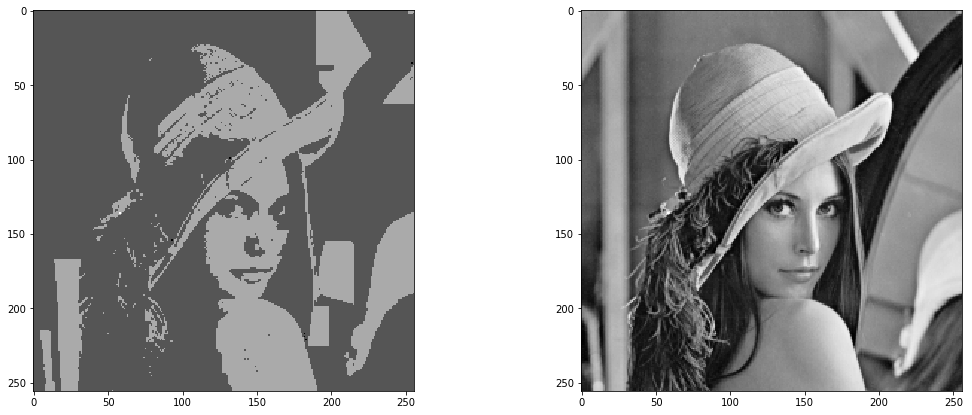

In [12]:
p = pcnn(kernel=kernel, epochs=epochs, V=V, alpha=alpha, beta=beta, do_rog=do_rog, scales=scales)
gen = p.get_gen(img_name)
# the image is read by the pcnn module normally, but needed in this notebook explicitly
img = p._read_img(img_name)
spatial_hist = np.zeros_like(img)
for epoch in range(epochs):
    spatial_hist = spatial_hist + next(gen)

f, axarr = plt.subplots(1,2,figsize=(18,7))
# f.tight_layout()

axarr[0].imshow(spatial_hist/epochs, 'gray')
axarr[1].imshow(img, 'gray')
plt.show()